In [1]:
#imports
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def BayesianPriorDirichlet(n, nx, S_total, data_points, dirichDist):
    
    # Generate Distribution
    np.random.Generator.dirichlet()
    
    
    
    return x, S, M, dists



In [3]:
# Declare input data

# n = number of months
n=12
# nx = number of wells
nx = 5
# Total Steam Flow
S_total = np.array([[74.77], [75.56], [76.2], [77.15], [78.4], [80.02], [82.1], [84.82], [88.29], [92.61], [98.03], [102.29]])
# Each data point can be defined by dictionary of mass flow, dryness, steam flow (and enthalpy excluded for now)

data = {'Well': [0, 1, 2, 3, 4], 'Month': [2, 3, 4, 5, 6], 'Dryness': [0.167407, 0.255054, 0.102372, 0.059778, 0.142205,], 
     'MassFlow': [121.5, 110.8, 54.8, 45.0, 142.5]}

# Establish DF fopr data points
df = pd.DataFrame(data = data)
df['SteamFlow'] = df['MassFlow'] * df['Dryness']
df['S_total'] = S_total[df['Month']]
df['Current_alloc'] = df['SteamFlow'] / df['S_total']


df

,Well,Month,Dryness,MassFlow,SteamFlow,S_total,Current_alloc
0,0,2,0.167407,121.5,20.339951,76.20,0.266928
1,1,3,0.255054,110.8,28.259983,77.15,0.366299
2,2,4,0.102372,54.8,5.609986,78.40,0.071556
3,3,5,0.059778,45.0,2.690010,80.02,0.033617
4,4,6,0.142205,142.5,20.264212,82.10,0.246824


In [4]:

alphas = df.groupby('Well').agg({'Current_alloc': 'mean'})['Current_alloc'].values
alphas


array([0.26692848, 0.3662992 , 0.07155594, 0.03361672, 0.24682354])

In [5]:
np.random.default_rng().dirichlet(alphas)

array([5.86853239e-01, 3.60411850e-02, 1.25448174e-08, 1.72602127e-17,
       3.77105564e-01])

In [6]:
def generateDryness(n, df):
    # Treat dryness as constant for now
    d = np.zeros([n,nx])
    
    # Take data from data points to get mean dryness
    well_dryness_means = df.groupby('Well').agg({'Dryness': 'mean'})['Dryness'].values

    # Assign to dryness matrix
    for i in range(n):
        d[i,:] = well_dryness_means
    
    return d

def generateSteamFlow(x, S_total):
    # x is n rows * xn columns
    # S_total is n * 1
    S = np.copy(x)
    for i in range(len(x)):
        S[i] = x[i] * S_total[i]

    return S

In [7]:
def BayesianPriorDirichlet(n, nx, alphas, data_points, S_total):
    x = np.random.default_rng().dirichlet(alphas, n)
    
    d = generateDryness(n, data_points)
    S = generateSteamFlow(x, S_total)
    M = np.divide(S,d)
    
    return x, d, S, M

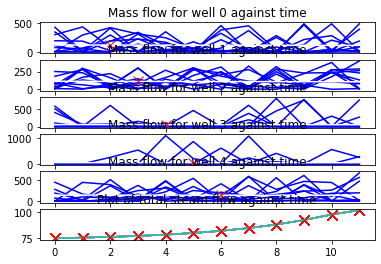

In [8]:

iterations = 10
# Iteratively call function to generate many results, and plot
fig, axes = plt.subplots(nx+1, sharex=True)
for i in range(iterations):

    # Call function
    x, d, S, M = BayesianPriorDirichlet(n, nx, alphas, df, S_total)
    
    for i in range(nx):
        # Colour it based on the proximity to data points!??
        
        
        # Plot the results
        axes[i].plot(range(n), M[:,i], 'b-')
        axes[i].set_title("Mass flow for well "+str(i)+" against time")

    
    # Plot total steam flow
    axes[nx].plot(range(n), np.sum(S, axis=1))
    axes[nx].set_title("Plot of total steam flow against time")
    axes[nx].plot(range(n), S_total[:,0], 'rx', markersize=10)

    
# Plot REAL (simulated) results on top
w0 = [123.8, 122.4, 121.5, 120.8, 120.1, 119.6, 119.1, 118.7, 118.2, 117.5, 116.7, 116.1]
w1 = [113.8, 112.4, 111.5, 110.8, 110.1, 109.6, 109.1, 108.7, 108.2, 107.5, 106.7, 106.1]
w2 = [56.5, 55.8, 55.3, 55, 54.8, 54.6, 54.3, 54.1, 54, 53.8, 53.6, 53.5]
w3 = [46.5, 45.9, 45.6, 45.3, 45.2, 45, 44.8, 44.7, 44.5, 44.4, 44.2, 44.1]
w4 = [141.8, 145.1, 144.3, 143.8, 143.3, 142.9, 142.4, 142, 141.6, 141.2, 140.8, 140.5]

    
axes[0].plot(range(n), w0, 'w-') 
axes[1].plot(range(n), w1, 'w-') 
axes[2].plot(range(n), w2, 'w-') 
axes[3].plot(range(n), w3, 'w-') 
axes[4].plot(range(n), w4, 'w-') 

# Plot any data points
for index, row in df.iterrows():
    axes[int(row['Well'])].plot(row['Month'], row['MassFlow'], 'rx', markersize=10)


In [9]:
d

array([[0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205],
       [0.167407, 0.255054, 0.102372, 0.059778, 0.142205]])